In [1]:
import json 
import pandas as pd 
with open(r"C:\Users\cassandra\Downloads\transaction-data-adhoc-analysis.json") as f:
    data = json.load(f)

In [2]:
data

[{'address': 'USNS Wagner\nFPO AE 00917',
  'birthdate': '1926/03/11',
  'mail': 'watsonbrenda@gmail.com',
  'name': 'Jennifer Campbell',
  'sex': 'F',
  'username': 'veronicawells',
  'transaction_items': 'Exotic Extras,Beef Chicharon,(x4)',
  'transaction_value': 5196,
  'transaction_date': '2022/01/12'},
 {'address': 'USCGC Benson\nFPO AP 48794',
  'birthdate': '2016/07/08',
  'mail': 'moorelisa@gmail.com',
  'name': 'Melissa Kim',
  'sex': 'F',
  'username': 'cgilbert',
  'transaction_items': 'Exotic Extras,Beef Chicharon,(x3);HealthyKid 3+,Nutrional Milk,(x4);Candy City,Orange Beans,(x1)',
  'transaction_value': 12056,
  'transaction_date': '2022/01/12'},
 {'address': 'USCGC Benson\nFPO AP 48794',
  'birthdate': '2016/07/08',
  'mail': 'moorelisa@gmail.com',
  'name': 'Melissa Kim',
  'sex': 'F',
  'username': 'cgilbert',
  'transaction_items': 'HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3+,Yummy Vegetables,(x2)',
  'transaction_value': 5500,
  'transaction_date': '2022/01/08'},

In [3]:
df = pd.DataFrame(data)
df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24


In [4]:
date_items = df[["transaction_date", "transaction_items"]]
date_items 

,transaction_date,transaction_items
0,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3..."
2,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3..."
3,2022/01/10,"HealthyKid 3+,Yummy Vegetables,(x1)"
4,2022/01/24,"Candy City,Orange Beans,(x3);Candy City,Gummy ..."
...,...,...
83031,2022/06/05,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK..."
83032,2022/06/12,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext..."
83033,2022/06/15,"Candy City,Orange Beans,(x4);Candy City,Gummy ..."
83034,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G..."


In [5]:
split_date= df['transaction_date'].str.split('/', n=3, expand=True)
split_date.rename(columns={0:'year',1:'month',2:'day'})

,year,month,day
0,2022,01,12
1,2022,01,12
2,2022,01,08
3,2022,01,10
4,2022,01,24
...,...,...,...
83031,2022,06,05
83032,2022,06,12
83033,2022,06,15
83034,2022,06,09


In [6]:
new_df=pd.concat([date_items, split_date.rename(columns={0:'year',1:'month',2:'day'})], axis =1)
new_df
new_df.drop(["year","day","transaction_date"], axis=1, inplace=True)
new_df

,transaction_items,month
0,"Exotic Extras,Beef Chicharon,(x4)",01
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",01
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",01
3,"HealthyKid 3+,Yummy Vegetables,(x1)",01
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",01
...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",06
83032,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",06
83033,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",06
83034,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",06


In [7]:
#separate the transaction_items
#url:https://www.statology.org/pandas-explode/
#follow note: one array only 
new_df['transaction_items'] = new_df['transaction_items'].str.split(';', expand= False)
newer_df = new_df.explode('transaction_items').reset_index(drop=True)
newer_df

,transaction_items,month
0,"Exotic Extras,Beef Chicharon,(x4)",01
1,"Exotic Extras,Beef Chicharon,(x3)",01
2,"HealthyKid 3+,Nutrional Milk,(x4)",01
3,"Candy City,Orange Beans,(x1)",01
4,"HealthyKid 3+,Gummy Vitamins,(x3)",01
...,...,...
166114,"HealthyKid 3+,Nutrional Milk,(x2)",06
166115,"Candy City,Gummy Worms,(x2)",06
166116,"HealthyKid 3+,Nutrional Milk,(x1)",06
166117,"Candy City,Gummy Worms,(x3)",06


In [8]:
newest_df=newer_df['transaction_items'].str.split(",", expand=True)
newest_df.rename(columns={0:'brand',1:'product',2:'quantity'})

,brand,product,quantity
0,Exotic Extras,Beef Chicharon,(x4)
1,Exotic Extras,Beef Chicharon,(x3)
2,HealthyKid 3+,Nutrional Milk,(x4)
3,Candy City,Orange Beans,(x1)
4,HealthyKid 3+,Gummy Vitamins,(x3)
...,...,...,...
166114,HealthyKid 3+,Nutrional Milk,(x2)
166115,Candy City,Gummy Worms,(x2)
166116,HealthyKid 3+,Nutrional Milk,(x1)
166117,Candy City,Gummy Worms,(x3)


In [9]:
table_1=pd.concat([newer_df,newest_df.rename(columns={0:'brand',1:'product',2:'quantity'})], axis =1)
table_1

,transaction_items,month,brand,product,quantity
0,"Exotic Extras,Beef Chicharon,(x4)",01,Exotic Extras,Beef Chicharon,(x4)
1,"Exotic Extras,Beef Chicharon,(x3)",01,Exotic Extras,Beef Chicharon,(x3)
2,"HealthyKid 3+,Nutrional Milk,(x4)",01,HealthyKid 3+,Nutrional Milk,(x4)
3,"Candy City,Orange Beans,(x1)",01,Candy City,Orange Beans,(x1)
4,"HealthyKid 3+,Gummy Vitamins,(x3)",01,HealthyKid 3+,Gummy Vitamins,(x3)
...,...,...,...,...,...
166114,"HealthyKid 3+,Nutrional Milk,(x2)",06,HealthyKid 3+,Nutrional Milk,(x2)
166115,"Candy City,Gummy Worms,(x2)",06,Candy City,Gummy Worms,(x2)
166116,"HealthyKid 3+,Nutrional Milk,(x1)",06,HealthyKid 3+,Nutrional Milk,(x1)
166117,"Candy City,Gummy Worms,(x3)",06,Candy City,Gummy Worms,(x3)


In [10]:
#url: https://stackoverflow.com/questions/20894525/how-to-remove-parentheses-and-all-data-within-using-pandas-python
#https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/#:~:text=2.-,Convert%20Column%20to%20int%20(Integer),int64%20%2C%20numpy.
table_1['quantity'] = table_1['quantity'].str.replace('[(,),x]', "", regex=True).astype(int)
table_1

,transaction_items,month,brand,product,quantity
0,"Exotic Extras,Beef Chicharon,(x4)",01,Exotic Extras,Beef Chicharon,4
1,"Exotic Extras,Beef Chicharon,(x3)",01,Exotic Extras,Beef Chicharon,3
2,"HealthyKid 3+,Nutrional Milk,(x4)",01,HealthyKid 3+,Nutrional Milk,4
3,"Candy City,Orange Beans,(x1)",01,Candy City,Orange Beans,1
4,"HealthyKid 3+,Gummy Vitamins,(x3)",01,HealthyKid 3+,Gummy Vitamins,3
...,...,...,...,...,...
166114,"HealthyKid 3+,Nutrional Milk,(x2)",06,HealthyKid 3+,Nutrional Milk,2
166115,"Candy City,Gummy Worms,(x2)",06,Candy City,Gummy Worms,2
166116,"HealthyKid 3+,Nutrional Milk,(x1)",06,HealthyKid 3+,Nutrional Milk,1
166117,"Candy City,Gummy Worms,(x3)",06,Candy City,Gummy Worms,3


In [11]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
table_1_final = table_1.groupby(['month','product'])['quantity'].sum().unstack()
table_1_final

product,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables
month,,,,,,,
01,9665,9681,9559,9676,9727,9774,9959
02,10001,9980,9996,9949,9691,10037,10256
03,9816,10145,9986,9967,9876,9611,9896
04,9890,9842,10043,9921,9786,9914,9861
05,10028,9948,9801,9773,9881,9964,9735
06,9902,9980,9934,10104,9767,10106,9722


In [12]:
month_1 = table_1_final.iloc[0]
month_1

product
Beef Chicharon        9665
Gummy Vitamins        9681
Gummy Worms           9559
Kimchi and Seaweed    9676
Nutrional Milk        9727
Orange Beans          9774
Yummy Vegetables      9959
Name: 01, dtype: int32

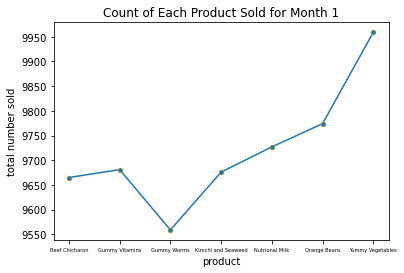

In [13]:
#https://stackoverflow.com/questions/52523710/matplotlib-increase-spacing-between-points-on-x-axis
import matplotlib.pyplot as plt
plt.plot(month_1,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Count of Each Product Sold for Month 1")
plt.xlabel("product")
plt.ylabel("total number sold")
plt.savefig("month_1.jpg")

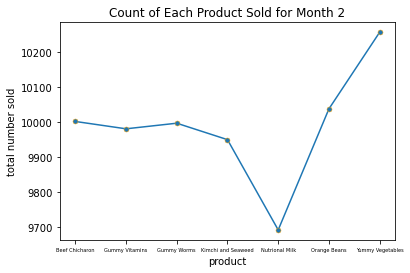

In [14]:
month_2 = table_1_final.iloc[1]
month_2
plt.plot(month_2,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Count of Each Product Sold for Month 2")
plt.xlabel("product")
plt.ylabel("total number sold")

plt.savefig("month_2.png")

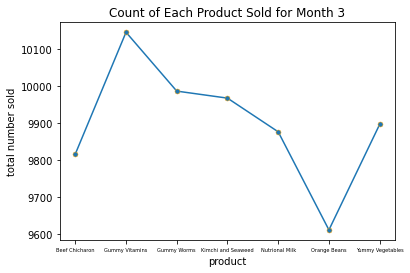

In [15]:
month_3 = table_1_final.iloc[2]
month_3
plt.plot(month_3,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Count of Each Product Sold for Month 3")
plt.xlabel("product")
plt.ylabel("total number sold")

plt.savefig("month_3.png")

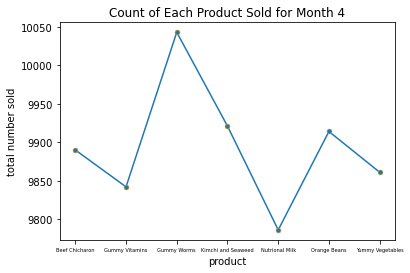

In [16]:
month_4 = table_1_final.iloc[3]
month_4
plt.plot(month_4,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Count of Each Product Sold for Month 4")
plt.xlabel("product")
plt.ylabel("total number sold")

plt.savefig("month_4.png")

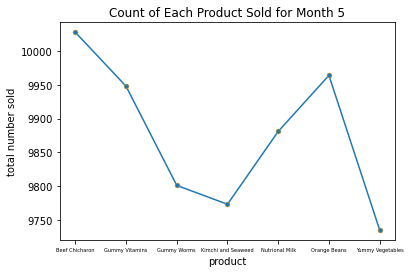

In [17]:
month_5 = table_1_final.iloc[4]
month_5
plt.plot(month_5,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Count of Each Product Sold for Month 5")
plt.xlabel("product")
plt.ylabel("total number sold")

plt.savefig("month_5.png")

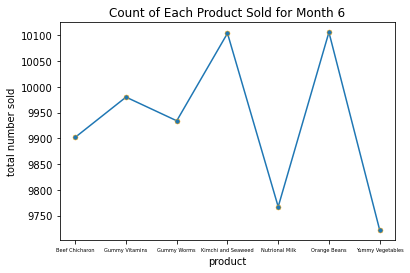

In [18]:
month_6 = table_1_final.iloc[5]
month_6
plt.plot(month_6,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.title("Count of Each Product Sold for Month 6")
plt.xlabel("product")
plt.ylabel("total number sold")

plt.savefig("month_6.png")

In [19]:
#end of numnber 1

In [20]:
table_1["product"].unique()

array(['Beef Chicharon', 'Nutrional Milk', 'Orange Beans',
       'Gummy Vitamins', 'Yummy Vegetables', 'Gummy Worms',
       'Kimchi and Seaweed'], dtype=object)

In [21]:
table_1["brand"].unique()

array(['Exotic Extras', 'HealthyKid 3+', 'Candy City'], dtype=object)

In [22]:
item_1 = df["transaction_items"] == "Exotic Extras,Beef Chicharon,(x1)"
df[item_1]
item_1_df = df[item_1].copy()
item_1_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
55,"89425 Davis Ville Apt. 766\nCabreraport, RI 07976",2002/10/28,dsanchez@hotmail.com,George Morales,M,znelson,"Exotic Extras,Beef Chicharon,(x1)",1299,2022/01/06
196,"01699 Scott Row Suite 508\nBurkefurt, VT 04207",1916/08/20,sheila02@yahoo.com,Deanna Chen,F,ymiller,"Exotic Extras,Beef Chicharon,(x1)",1299,2022/01/15
263,"708 Jones Harbors\nOliviaburgh, DC 18438",1921/09/30,knichols@yahoo.com,Erin Wright,F,kristin25,"Exotic Extras,Beef Chicharon,(x1)",1299,2022/01/10
274,"8057 Danielle Creek\nSawyerhaven, MS 21081",1937/06/07,blanchardjennifer@yahoo.com,Daniel Watts,M,brandon15,"Exotic Extras,Beef Chicharon,(x1)",1299,2022/01/23
341,"14416 Lauren Wells Suite 408\nMcconnellmouth, ...",2007/09/24,juarezjohn@hotmail.com,Linda Sutton,F,ganderson,"Exotic Extras,Beef Chicharon,(x1)",1299,2022/01/03


In [23]:
item_2 = df["transaction_items"] == "HealthyKid 3+,Nutrional Milk,(x1)"
df[item_2]
item_2_df = df[item_2].copy()
item_2_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
227,"44099 Whitney Springs\nTimothyland, WV 98467",1914/07/22,elliottnicholas@gmail.com,Donna Douglas,F,millerbenjamin,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/01/14
333,9754 Michael Lodge Suite 703\nEast Christopher...,1926/06/08,ksmith@hotmail.com,Lisa Mcdaniel,F,kellyowens,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/01/26
402,Unit 3988 Box 9648\nDPO AP 82743,1925/04/26,woodarddavid@yahoo.com,Tiffany Bryant,F,sjohnson,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/01/30
663,"03282 Johns Courts\nWest Tina, IN 83667",1925/05/17,mosleyjessica@yahoo.com,Jessica Howard,F,andrew00,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/01/21
694,50703 Anderson Fall Apt. 458\nSouth Michaelshi...,1936/01/14,sarahsmall@gmail.com,Michael Mayo,M,dcastro,"HealthyKid 3+,Nutrional Milk,(x1)",1990,2022/01/13


In [24]:
item_3 = df["transaction_items"] == "Candy City,Orange Beans,(x1)"
df[item_3]
item_3_df = df[item_3].copy()
item_3_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
142,"02723 Tina Mountain Apt. 892\nPort Deanna, IN ...",2010/02/20,rrojas@hotmail.com,Jerry Sharp,M,peggyramirez,"Candy City,Orange Beans,(x1)",199,2022/01/25
153,"574 Miller Mews Apt. 165\nJohnsonchester, ND 8...",1934/09/20,alexandra70@yahoo.com,Adam Kelly,M,joshua93,"Candy City,Orange Beans,(x1)",199,2022/01/13
232,"875 Jackson Motorway Suite 496\nWest Regina, S...",1974/09/19,harrissonya@yahoo.com,Jennifer Hill,F,nathanberg,"Candy City,Orange Beans,(x1)",199,2022/01/23
246,"901 Adams Shores\nThomasberg, MO 20726",1980/10/05,jaredbowen@hotmail.com,Matthew Martin,M,bradleyberg,"Candy City,Orange Beans,(x1)",199,2022/01/02
254,"67955 Lopez Forges Apt. 611\nDakotafort, OR 34616",1974/08/22,stephanie11@hotmail.com,Sarah Meyers,F,regina87,"Candy City,Orange Beans,(x1)",199,2022/01/07


In [25]:
item_4 = df["transaction_items"] == "HealthyKid 3+,Gummy Vitamins,(x1)"
df[item_4]
item_4_df = df[item_4].copy()
item_4_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
204,"82286 Melanie Coves\nSamuelstad, SC 73273",1941/11/09,tracy03@hotmail.com,Alan Sanchez,M,smithrachel,"HealthyKid 3+,Gummy Vitamins,(x1)",1500,2022/01/03
270,"60194 Shannon Trace\nNorth Kristenbury, SD 15411",1926/03/07,angelicapayne@yahoo.com,Robert Mccullough,M,michaelhoffman,"HealthyKid 3+,Gummy Vitamins,(x1)",1500,2022/01/04
463,"78167 Dustin Lane Apt. 171\nGardnermouth, IN 0...",1976/12/23,jennifer04@gmail.com,Carla Sparks,F,kenneth94,"HealthyKid 3+,Gummy Vitamins,(x1)",1500,2022/01/07
476,"8137 Jesse Unions\nLake Elizabeth, ND 49005",1955/08/14,robert66@hotmail.com,Jose Nelson,M,goldenwilliam,"HealthyKid 3+,Gummy Vitamins,(x1)",1500,2022/01/11
499,"16427 Melissa Roads Apt. 114\nSusanview, NY 17155",1923/01/25,arthur93@gmail.com,Jason Hatfield,M,nelsonshawn,"HealthyKid 3+,Gummy Vitamins,(x1)",1500,2022/01/15


In [26]:
item_5 = df["transaction_items"] == "HealthyKid 3+,Yummy Vegetables,(x1)"
df[item_5]
item_5_df = df[item_5].copy()
item_5_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
172,"8200 Simmons Dam Suite 754\nCastilloside, OH 6...",1980/08/09,spencercortez@gmail.com,Eddie Anderson,M,deanna18,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/18
194,"01699 Scott Row Suite 508\nBurkefurt, VT 04207",1916/08/20,sheila02@yahoo.com,Deanna Chen,F,ymiller,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/29
221,"1256 Reilly Mews Apt. 555\nCharlesfort, MO 62761",1909/01/25,williamsmichael@gmail.com,Sharon Johnson,F,qjones,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/12
230,"1487 Mason Estate Apt. 085\nPort Greg, FL 13771",1996/01/15,fcombs@yahoo.com,Robert Bryant,M,melissabowen,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/16


In [27]:
item_6 = df["transaction_items"] == "Candy City,Gummy Worms,(x1)"
df[item_6]
item_6_df = df[item_6].copy()
item_6_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
8,"63261 Brewer Drive Apt. 704\nLake Alicia, NJ 0...",1956/08/27,racheldiaz@gmail.com,Jennifer Figueroa,F,hoodbrett,"Candy City,Gummy Worms,(x1)",150,2022/01/11
337,"3391 Jeffrey Cove\nEast Sheila, OK 54272",1918/09/09,williambrown@yahoo.com,Jack Herman,M,jasmine26,"Candy City,Gummy Worms,(x1)",150,2022/01/17
415,"38984 Wright Lake\nEast Jillian, ND 94772",1983/08/27,waltersdavid@gmail.com,Paul Brown,M,lopezanthony,"Candy City,Gummy Worms,(x1)",150,2022/01/19
512,"7241 Ramirez Avenue\nWest Jason, RI 16955",1937/05/03,ramirezmackenzie@yahoo.com,Kristi Sherman,F,hbell,"Candy City,Gummy Worms,(x1)",150,2022/01/22
743,4485 Edwin Islands Apt. 055\nWest Jenniferches...,2000/12/24,jefferyyoung@yahoo.com,Jennifer Perez,F,teresa32,"Candy City,Gummy Worms,(x1)",150,2022/01/07


In [28]:
item_7 = df["transaction_items"] == "Exotic Extras,Kimchi and Seaweed,(x1)"
df[item_7]
item_7_df = df[item_7].copy()
item_7_df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
61,"7382 Jennifer Overpass Apt. 621\nNicolemouth, ...",1933/06/08,ucruz@gmail.com,Samantha Lopez,F,matthew57,"Exotic Extras,Kimchi and Seaweed,(x1)",799,2022/01/20
99,"311 White Inlet\nJenkinsberg, HI 93837",1964/06/22,snyderamy@hotmail.com,Shawn Jones,M,mkrueger,"Exotic Extras,Kimchi and Seaweed,(x1)",799,2022/01/22
167,"0157 Edwards Lodge\nCrystalmouth, OK 37726",1973/12/27,ianlee@hotmail.com,Paul Baker,M,elizabethholloway,"Exotic Extras,Kimchi and Seaweed,(x1)",799,2022/01/19
292,"002 Alexander Camp Apt. 255\nRhodesburgh, NJ 1...",2000/05/05,wgriffin@gmail.com,Cheryl Patterson,F,tchung,"Exotic Extras,Kimchi and Seaweed,(x1)",799,2022/01/24
470,Unit 1931 Box 2451\nDPO AA 93556,1988/12/13,vduncan@yahoo.com,Walter Brown,M,btucker,"Exotic Extras,Kimchi and Seaweed,(x1)",799,2022/01/02


In [29]:
price_list= [["Beef Chicharon", item_1_df["transaction_value"].unique()],["Nutrional Milk",item_2_df["transaction_value"].unique()],["Orange Beans", item_3_df["transaction_value"].unique()],["Gummy Vitamins",item_4_df["transaction_value"].unique()],["Yummy Vegetables", item_5_df["transaction_value"].unique()],["Gummy Worms",item_6_df["transaction_value"].unique()],["Kimchi and Seaweed",item_7_df["transaction_value"].unique()]]
price_list_df = pd.DataFrame(price_list,columns=["product","price"])
price_list_df

,product,price
0,Beef Chicharon,[1299]
1,Nutrional Milk,[1990]
2,Orange Beans,[199]
3,Gummy Vitamins,[1500]
4,Yummy Vegetables,[500]
5,Gummy Worms,[150]
6,Kimchi and Seaweed,[799]


In [30]:
#https://www.tutorialspoint.com/python_pandas/python_pandas_merging_joining.htm
#https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe
table_2 = pd.merge(table_1,price_list_df,on='product')
table_2
table_2['price'] = table_2['price'].str.get(0)
table_2

,transaction_items,month,brand,product,quantity,price
0,"Exotic Extras,Beef Chicharon,(x4)",01,Exotic Extras,Beef Chicharon,4,1299
1,"Exotic Extras,Beef Chicharon,(x3)",01,Exotic Extras,Beef Chicharon,3,1299
2,"Exotic Extras,Beef Chicharon,(x4)",01,Exotic Extras,Beef Chicharon,4,1299
3,"Exotic Extras,Beef Chicharon,(x2)",01,Exotic Extras,Beef Chicharon,2,1299
4,"Exotic Extras,Beef Chicharon,(x2)",01,Exotic Extras,Beef Chicharon,2,1299
...,...,...,...,...,...,...
166114,"Exotic Extras,Kimchi and Seaweed,(x4)",06,Exotic Extras,Kimchi and Seaweed,4,799
166115,"Exotic Extras,Kimchi and Seaweed,(x1)",06,Exotic Extras,Kimchi and Seaweed,1,799
166116,"Exotic Extras,Kimchi and Seaweed,(x1)",06,Exotic Extras,Kimchi and Seaweed,1,799
166117,"Exotic Extras,Kimchi and Seaweed,(x2)",06,Exotic Extras,Kimchi and Seaweed,2,799


In [31]:
table_2['total_price'] = table_2['quantity'] * table_2['price']
table_2

,transaction_items,month,brand,product,quantity,price,total_price
0,"Exotic Extras,Beef Chicharon,(x4)",01,Exotic Extras,Beef Chicharon,4,1299,5196
1,"Exotic Extras,Beef Chicharon,(x3)",01,Exotic Extras,Beef Chicharon,3,1299,3897
2,"Exotic Extras,Beef Chicharon,(x4)",01,Exotic Extras,Beef Chicharon,4,1299,5196
3,"Exotic Extras,Beef Chicharon,(x2)",01,Exotic Extras,Beef Chicharon,2,1299,2598
4,"Exotic Extras,Beef Chicharon,(x2)",01,Exotic Extras,Beef Chicharon,2,1299,2598
...,...,...,...,...,...,...,...
166114,"Exotic Extras,Kimchi and Seaweed,(x4)",06,Exotic Extras,Kimchi and Seaweed,4,799,3196
166115,"Exotic Extras,Kimchi and Seaweed,(x1)",06,Exotic Extras,Kimchi and Seaweed,1,799,799
166116,"Exotic Extras,Kimchi and Seaweed,(x1)",06,Exotic Extras,Kimchi and Seaweed,1,799,799
166117,"Exotic Extras,Kimchi and Seaweed,(x2)",06,Exotic Extras,Kimchi and Seaweed,2,799,1598


In [32]:
table_2_final = table_2.groupby(['month','product'])['total_price'].sum().unstack()
table_2_final

product,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables
month,,,,,,,
01,12554835,14521500,1433850,7731124,19356730,1945026,4979500
02,12991299,14970000,1499400,7949251,19285090,1997363,5128000
03,12750984,15217500,1497900,7963633,19653240,1912589,4948000
04,12847110,14763000,1506450,7926879,19474140,1972886,4930500
05,13026372,14922000,1470150,7808627,19663190,1982836,4867500
06,12862698,14970000,1490100,8073096,19436330,2011094,4861000


In [33]:
sum1 = table_2_final.sum(axis=1)
sum1

month
01    62522565
02    63820403
03    63943846
04    63420965
05    63740675
06    63704318
dtype: int64

In [34]:
table_2_final['Sum'] =sum1
table_2_final

product,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables,Sum
month,,,,,,,,
01,12554835,14521500,1433850,7731124,19356730,1945026,4979500,62522565
02,12991299,14970000,1499400,7949251,19285090,1997363,5128000,63820403
03,12750984,15217500,1497900,7963633,19653240,1912589,4948000,63943846
04,12847110,14763000,1506450,7926879,19474140,1972886,4930500,63420965
05,13026372,14922000,1470150,7808627,19663190,1982836,4867500,63740675
06,12862698,14970000,1490100,8073096,19436330,2011094,4861000,63704318


In [35]:
#end of number 2

In [36]:
df = pd.DataFrame(data)
df.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24


In [37]:
name_date = df[["name", "transaction_date"]]
name_date

,name,transaction_date
0,Jennifer Campbell,2022/01/12
1,Melissa Kim,2022/01/12
2,Melissa Kim,2022/01/08
3,Melissa Kim,2022/01/10
4,Kristen Cooper,2022/01/24
...,...,...
83031,Tammy Byrd,2022/06/05
83032,Donald Andersen,2022/06/12
83033,Donald Andersen,2022/06/15
83034,Donald Andersen,2022/06/09


In [38]:
split_date= df['transaction_date'].str.split('/', n=3, expand=True)
split_date.rename(columns={0:'year',1:'month',2:'day'})

,year,month,day
0,2022,01,12
1,2022,01,12
2,2022,01,08
3,2022,01,10
4,2022,01,24
...,...,...,...
83031,2022,06,05
83032,2022,06,12
83033,2022,06,15
83034,2022,06,09


In [39]:
tab3=pd.concat([name_date, split_date.rename(columns={0:'year',1:'month',2:'day'})], axis =1)
tab3
tab3.drop(["year","day","transaction_date"], axis=1, inplace=True)
tab3

,name,month
0,Jennifer Campbell,01
1,Melissa Kim,01
2,Melissa Kim,01
3,Melissa Kim,01
4,Kristen Cooper,01
...,...,...
83031,Tammy Byrd,06
83032,Donald Andersen,06
83033,Donald Andersen,06
83034,Donald Andersen,06


In [40]:
#https://sparkbyexamples.com/pandas/pandas-drop-duplicate-rows-from-dataframe/#:~:text=You%20can%20set%20'keep%3DFalse,drop_duplicates(keep%3DFalse)%20.
tab3 = tab3.drop_duplicates(subset=["name", "month"], keep='first')
tab3

,name,month
0,Jennifer Campbell,01
1,Melissa Kim,01
4,Kristen Cooper,01
5,Alexander Davis,01
6,Michael Lowe,01
...,...,...
83025,Shirley Everett,06
83027,Brenda Gardner,06
83028,Bethany Peters,06
83030,Tammy Byrd,06


In [41]:
tab3 = tab3.groupby('month')
tab3 = tab3['name'].unique().apply(list).reset_index()
tab3

,month,name
0,01,"[Jennifer Campbell, Melissa Kim, Kristen Coope..."
1,02,"[Jennifer Campbell, Melissa Kim, Kristen Coope..."
2,03,"[Jennifer Campbell, Melissa Kim, Kristen Coope..."
3,04,"[Melissa Kim, Kristen Cooper, Alexander Davis,..."
4,05,"[Melissa Kim, Kristen Cooper, Alexander Davis,..."
5,06,"[Jennifer Campbell, Alexander Davis, Michael L..."


In [42]:
tab3.dtypes

month    object
name     object
dtype: object

In [43]:
def repeaters(tab3):
    for_month01 = 0
    for_month12 = 0
    for_month23 = 0
    for_month34 = 0
    for_month45 = 0
    for_month56= 0
    for name in tab3.iloc[0,1]:
        if name in tab3.iloc[0,1] and name in tab3.iloc[0,1]:
            for_month01 += 0
        else:
            for_month01 += 0
    for name in tab3.iloc[0,1]:
        if name in tab3.iloc[0,1] and name in tab3.iloc[1,1]:
            for_month12 += 1
        else:
            for_month12 += 0
    for name in tab3.iloc[1,1]:
        if name in tab3.iloc[1,1] and name in tab3.iloc[2,1]:
            for_month23 += 1
        else:
            for_month23 += 0
    for name in tab3.iloc[2,1]:
        if name in tab3.iloc[2,1] and name in tab3.iloc[3,1]:
            for_month34 += 1
        else:
            for_month34 += 0
    for name in tab3.iloc[3,1]:
        if name in tab3.iloc[3,1] and name in tab3.iloc[4,1]:
            for_month45 += 1
        else:
            for_month45 += 0
    for name in tab3.iloc[4,1]:
        if name in tab3.iloc[4,1] and name in tab3.iloc[5,1]:
            for_month56 += 1
        else:
            for_month56 += 0
    return(for_month01, for_month12, for_month23, for_month34, for_month45, for_month56)

In [44]:
repeaters = repeaters(tab3)
repeaters

(0, 5172, 5216, 5154, 5110, 5193)

In [45]:
#https://stackoverflow.com/questions/42202872/how-to-convert-list-to-row-dataframe-with-pandas
rep = pd.DataFrame([repeaters])
rep

,0,1,2,3,4,5
0,0,5172,5216,5154,5110,5193


In [46]:
#https://www.geeksforgeeks.org/python-set-method/
def inactive(tab3):
    for_month01 = 0
    for_month12 = 0
    for_month13 = 0
    for_month14 = 0
    for_month15 = 0
    for_month16= 0
    for name in tab3.iloc[0,1]:
        if name in  tab3.iloc[0,1]:
            for_month01 += 0
        else:
            for_month01 += 0
    for name in tab3.iloc[0,1]:
        if name in tab3.iloc[0,1] and name not in tab3.iloc[1,1]:
            for_month12 += 1
        else:
            for_month12 += 0
    for name in set (tab3.iloc[0,1] + tab3.iloc[1,1]):
        if name not in tab3.iloc[2,1]:
            for_month13 += 1
        else:
            for_month13 += 0
    for name in set (tab3.iloc[0,1] + tab3.iloc[1,1] + tab3.iloc[2,1]):
        if name not in tab3.iloc[3,1]:
            for_month14 += 1
        else:
            for_month14 += 0
    for name in set (tab3.iloc[0,1] + tab3.iloc[1,1] + tab3.iloc[2,1] + tab3.iloc[3,1]):
        if name not in tab3.iloc[4,1]:
            for_month15 += 1
        else:
            for_month15 += 0
    for name in set (tab3.iloc[0,1] + tab3.iloc[1,1] + tab3.iloc[2,1] + tab3.iloc[3,1] + tab3.iloc[4,1]):
        if name not in tab3.iloc[5,1]:
            for_month16 += 1
        else:
            for_month16 += 0
    return(for_month01, for_month12, for_month13, for_month14, for_month15, for_month16)

In [47]:
inactive = inactive(tab3)
inactive

(0, 1416, 1747, 1909, 1917, 1835)

In [48]:
ina = pd.DataFrame([inactive])
ina

,0,1,2,3,4,5
0,0,1416,1747,1909,1917,1835


In [49]:
def engaged(tab3):
    for_month01 = 0
    for_month12 = 0
    for_month13 = 0
    for_month14 = 0
    for_month15 = 0
    for_month16 = 0
    for name in tab3.iloc[0,1]:
        if name in tab3.iloc[0,1]:
            for_month01 += 1
        else:
            for_month01 += 0
    for name in tab3.iloc[0,1]:
        if name in tab3.iloc[0,1] and name in tab3.iloc[1,1]:
            for_month12 += 1
        else:
            for_month12 += 0
    for name in tab3.iloc[1,1]:
        if name in tab3.iloc[1,1]and name in tab3.iloc[0,1] and name in tab3.iloc[2,1]:
            for_month13 += 1
        else:
            for_month13 += 0
    for name in tab3.iloc[2,1]:
        if name in tab3.iloc[2,1] and name in tab3.iloc[0,1] and name in tab3.iloc[1,1] and name in tab3.iloc[3,1]:
            for_month14 += 1
        else:
            for_month14 += 0
    for name in tab3.iloc[3,1]:
        if name in tab3.iloc[3,1] and name in tab3.iloc[0,1] and name in tab3.iloc[1,1] and name in tab3.iloc[2,1] and name in tab3.iloc[4,1]:
            for_month15 += 1
        else:
            for_month15 += 0
    for name in tab3.iloc[4,1]:
        if name in tab3.iloc[4,1] and name in tab3.iloc[0,1] and name in tab3.iloc[1,1] and name in tab3.iloc[2,1] and name in tab3.iloc[3,1] and name in tab3.iloc[5,1]:
            for_month16 += 1
        else:
            for_month01 += 0
    return(for_month01, for_month12, for_month13, for_month14, for_month15, for_month16)

In [50]:
engaged = engaged(tab3)
engaged

(6588, 5172, 4126, 3289, 2667, 2190)

In [51]:
eng = pd.DataFrame([engaged])
eng

,0,1,2,3,4,5
0,6588,5172,4126,3289,2667,2190


In [52]:
#https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/#:~:text=The%20concat()%20function%20in,any)%20on%20the%20other%20axes.
#https://datagy.io/pandas-drop-index-column/
frame = [rep,ina,eng]
table3=pd.concat(frame,)
table3 = table3.reset_index(drop=True)
table3 = table3.add_prefix('Mon ')
table3

,Mon 0,Mon 1,Mon 2,Mon 3,Mon 4,Mon 5
0,0,5172,5216,5154,5110,5193
1,0,1416,1747,1909,1917,1835
2,6588,5172,4126,3289,2667,2190


In [53]:
#https://www.youtube.com/watch?v=ZxHPMa7YdzM
table3.rename({'Mon 0': 'Month 1', 'Mon 1': 'Month 2','Mon 2': 'Month 3','Mon 3': 'Month 4', 'Mon 4': 'Month 5','Mon 5': 'Month 6' }, axis=1, inplace=True)
table3

,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6
0,0,5172,5216,5154,5110,5193
1,0,1416,1747,1909,1917,1835
2,6588,5172,4126,3289,2667,2190


In [54]:
Metrics = ['Repeaters', 'Inactive', 'Engaged']
table3['Metrics'] = Metrics
table3

,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Metrics
0,0,5172,5216,5154,5110,5193,Repeaters
1,0,1416,1747,1909,1917,1835,Inactive
2,6588,5172,4126,3289,2667,2190,Engaged


In [55]:
#https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/#:~:text=The%20basic%20idea%20to%20move,to%20manipulate%20with%20our%20dataframe.
first_column = table3.pop('Metrics')
table3.insert(0, 'Metrics', first_column)
table3

,Metrics,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6
0,Repeaters,0,5172,5216,5154,5110,5193
1,Inactive,0,1416,1747,1909,1917,1835
2,Engaged,6588,5172,4126,3289,2667,2190


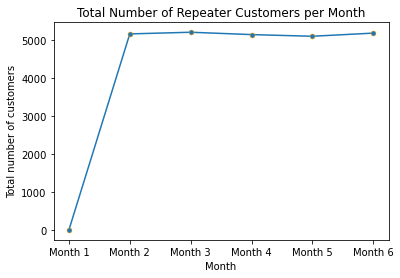

In [56]:
Repeat = table3.iloc[0,1:7]
Repeat
plt.plot(Repeat,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title("Total Number of Repeater Customers per Month")
plt.xlabel("Month")
plt.ylabel("Total number of customers")
plt.savefig("Repeat.png")

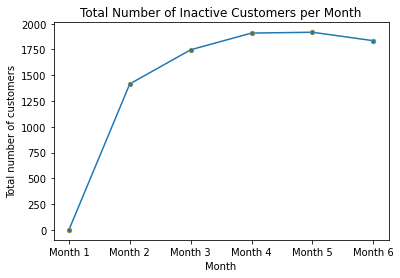

In [57]:
Inactive = table3.iloc[1,1:7]
Inactive
plt.plot(Inactive,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title("Total Number of Inactive Customers per Month")
plt.xlabel("Month")
plt.ylabel("Total number of customers")
plt.savefig("Inactive.png")

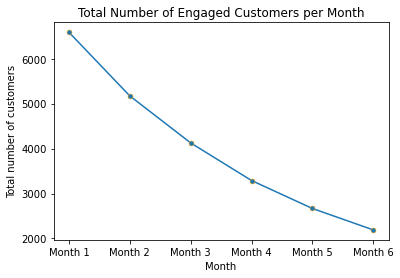

In [58]:
Engaged = table3.iloc[2,1:7]
Engaged
plt.plot(Engaged,marker='.', markersize=10, markeredgewidth=0.5, markeredgecolor="orange")
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title("Total Number of Engaged Customers per Month")
plt.xlabel("Month")
plt.ylabel("Total number of customers")
plt.savefig("Engaged.png")